In [148]:
%matplotlib inline
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [149]:
#first import your levels csv (perhaps at level5)
M1 = pd.read_csv("/home/diana/qbb2/tables/dada2/11/extractbarplot11/data/level-5.csv")
M2 = pd.read_csv("/home/diana/qbb2/tables/dada2/2/barplotextract/data/level-5.csv")
M3 = pd.read_csv("/home/diana/qbb2/tables/dada2/trim/15/extractbarplot15/data/level-5.csv")
M4 = pd.read_csv("/home/diana/qbb2/tables/dada2/trim/16/extractbarplot16/data/level-5.csv")

In [150]:
#remove the metadata from the tables
M1 = M1.drop(columns = ['index','investigation_id','date','week','week_plus_year','depth','depth_code','name'])
M2 = M2.drop(columns = ['index','investigation_id','date','week','week_plus_year','depth','depth_code','name'])
M3 = M3.drop(columns = ['index','investigation_id','date','week','week_plus_year','depth','depth_code','name'])
M4 = M4.drop(columns = ['index','investigation_id','date','week','week_plus_year','depth','depth_code','name'])


In [151]:
#sum each rows to get total # of tax
M1 = M1.sum().to_frame().rename(columns={0:'M1'})
M2 = M2.sum().to_frame().rename(columns={0:'M2'})
M3 = M3.sum().to_frame().rename(columns={0:'M3'})
M4 = M4.sum().to_frame().rename(columns={0:'M4'})

In [156]:
#merge each column
M1_2 = M1.merge(M2, how='outer', left_index = True, right_index = True)
M1_2_3 = M1_2.merge(M3, how='outer', left_index = True, right_index = True)
M1_2_3_4 = M1_2_3.merge(M4, how='outer', left_index = True, right_index = True)

#replace Nan by 0
Method = M1_2_3_4.fillna(0)

In [157]:
Method = Method.transpose()

In [158]:
#make it into a distance matrix
distance_matrix = squareform(pdist(Method.values))

In [159]:
distance_matrix = pd.DataFrame(data=distance_matrix)

In [160]:
distance_matrix

,0,1,2,3
0,0.000000,920109.362446,981435.716782,480456.301458
1,920109.362446,0.000000,147853.914574,456072.754487
2,981435.716782,147853.914574,0.000000,502657.454981
3,480456.301458,456072.754487,502657.454981,0.000000


In [161]:
pca = PCA(n_components=2)
X2d = pca.fit_transform(distance_matrix)

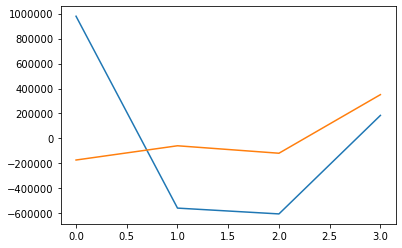

In [164]:
plt.plot(X2d)

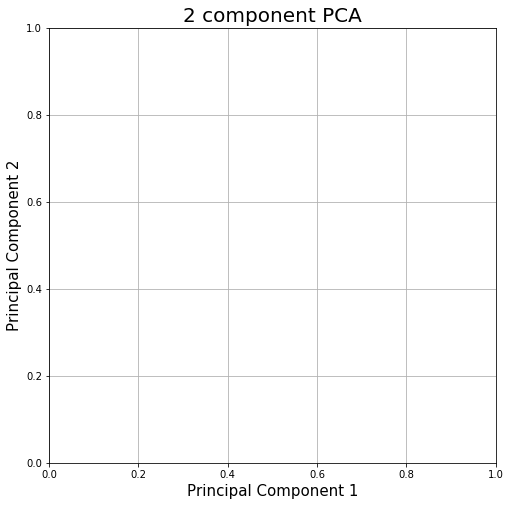

In [106]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.grid()